In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import scipy.stats as stats
from pydataset import data
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = data('Boston')

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

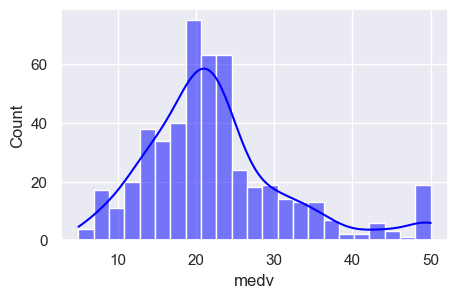

In [4]:
# plot the target variable to check the distribution

sns.set(rc={'figure.figsize':(5,3)})
sns.histplot(boston['medv'], color='blue', kde=True)
plt.show()

In [5]:
# MEDV are distributed normally with few outliers.
# Create a correlation matrix that measures the linear relationships between the variables.

<Axes: >

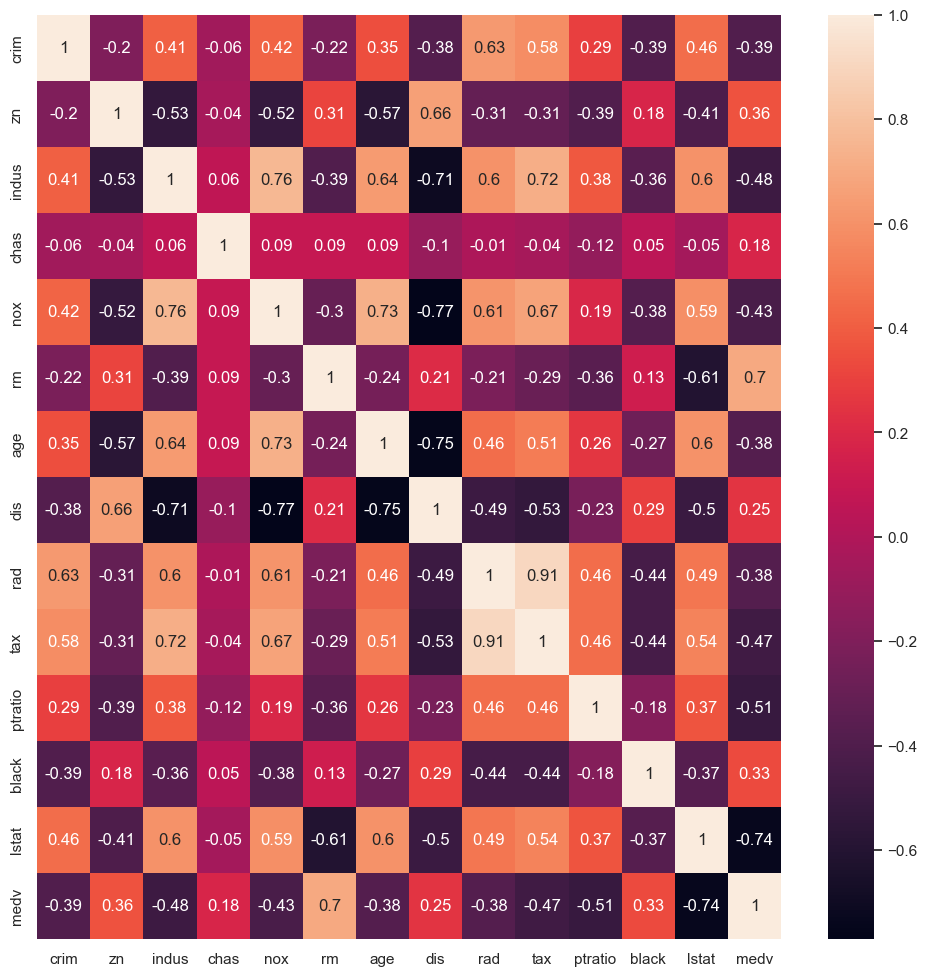

In [6]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
fig = plt.figure(figsize=(12,12))
sns.heatmap(data=correlation_matrix, annot=True)

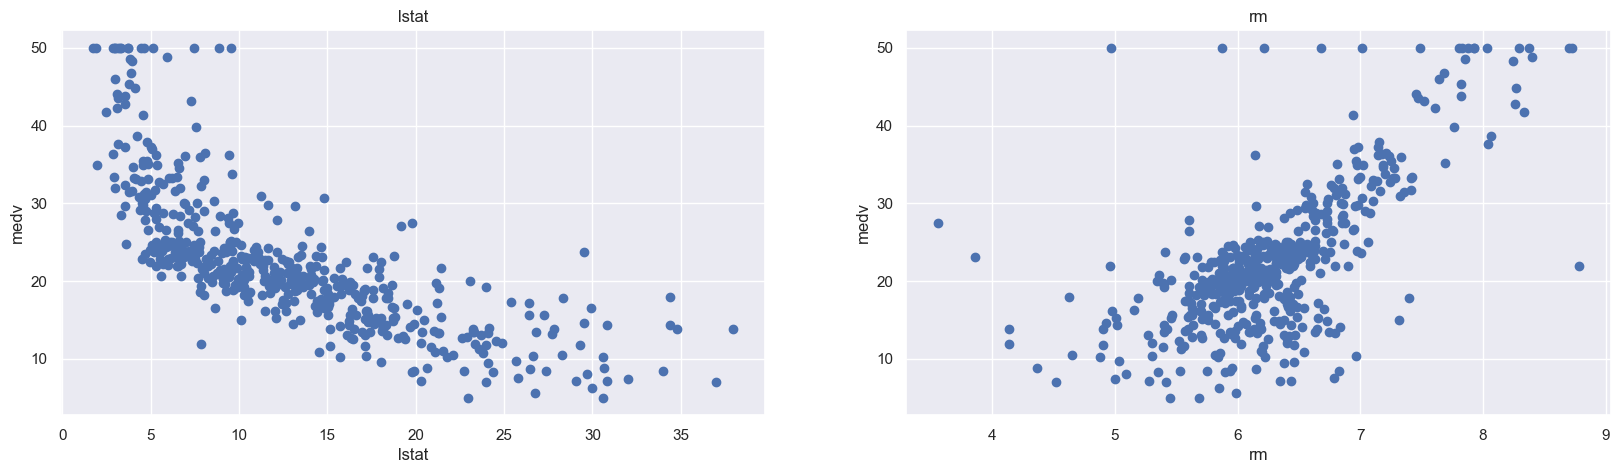

In [7]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = boston['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [8]:
#The prices increase as the value of RM increases linearly.

#The prices tend to decrease with an increase in LSTAT. 

In [9]:
X = boston.iloc[:,0:len(boston.columns)-1]

Y = boston.iloc[:,-1:]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [12]:
# model evaluation for training set
y_train_predict = linear.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("-"*40)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
----------------------------------------
RMSE is 4.741000992236516
R2 score is 0.738339392059052




In [13]:
# model evaluation for testing set
y_test_predict = linear.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("-"*40)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
----------------------------------------
RMSE is 4.568292042303187
R2 score is 0.73344921474531


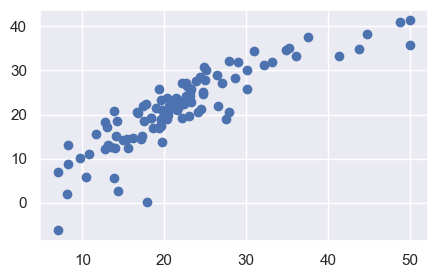

In [14]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()     

In [15]:
import statsmodels.api as sm

In [16]:
# generate OLS model
model = sm.OLS(Y, sm.add_constant(X))
model_ = model.fit()

In [17]:
print(model_.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          6.72e-135
Time:                        22:58:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## What are diagnostic plots?

#### Diagnostic plots help us determine visually how our model is fitting the data and if any of the basic assumptions of an OLS model are being violated. We will be looking at four main plots in this post and describe how each of them can be used to diagnose issues in an OLS model. Each of these plots will focus on the residuals — or errors — of a model, which is mathematical jargon for the difference between the actual value and the predicted value.

#### 1) The data can be fit by a line.
#### 2) Errors are normally distributed with mean zero.
#### 3) Errors have constant variance, i.e., homoscedasticity.

#### Homoscedasticity : In statistics, a sequence (or a vector) of random variables is homoscedastic. If all its random variables have the same finite variance; this is also known as homogeneity of variance. The complementary notion is called heteroscedasticity, also known as heterogeneity of variance.

#### 4) There are no high leverage points
#### High leverage points : A high leverage point, in simple terms, refers to an observation or data point that has a significant influence on the regression model. It is an outlier in the predictor space that can greatly affect the model’s estimated coefficients or predictions. High leverage points have extreme values or unusual combinations of predictor variables, leading them to have a disproportionate impact on the model’s overall fit. These points can distort the regression line, making it crucial to identify and examine them to assess their influence on the model’s results.

In [18]:
# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, Y], axis=1)

## Residuals vs Fitted

#### The Residuals vs Fitted Values plot is designed to check the linearity assumption of the model. It helps to identify if there are any patterns or trends in the residuals concerning the fitted (predicted) values.
#### Random Scatter: In a well-fitted model, the residuals should be randomly scattered around the horizontal axis (zero line) with no discernible     pattern. This suggests that the model captures the underlying linear relationship adequately.
#### Patterns: If there are patterns, it might indicate non-linearity in the data that the model fails to capture.
#### This plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable, and the pattern could show up in this plot if the model doesn’t capture the non-linear relationship. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you don’t have non-linear relationships.


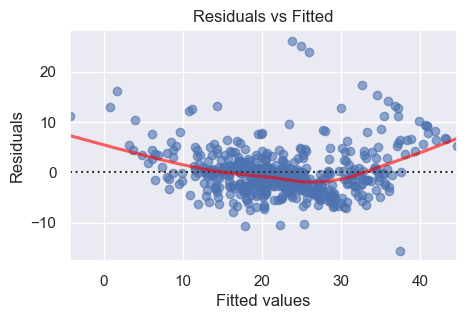

In [19]:
# model values
model_fitted = model_.fittedvalues

# model residuals
model_residuals = model_.resid

# normalized residuals
model_norm_residuals = model_.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(data=dataframe, 
                                  x=model_fitted, 
                                  y=model_residuals, 
                                  lowess=True, 
                                  scatter_kws={'alpha': 0.6},
                                  line_kws={'color': 'red', 'alpha': 0.6})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

#### Examine the plot generated using the housing dataset. 
#### Notice the bow-shaped line in red. This is an indicator that we are failing to capture some of the non-linear features of the model. In other words, we are underfitting the model. Perhaps the variance in the data might be better captured using the square (or some other non-linear transformation) of one or more of the features. Which feature(s) specifically is beyond the scope of this post.

## Normal Q-Q Plot

#### This plot shows if the residuals are normally distributed. A good normal QQ plot has all of the residuals lying on or close to the red line.

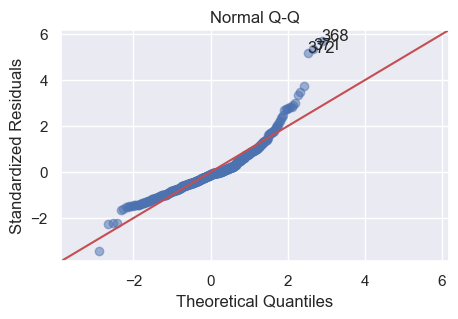

In [20]:
QQ = ProbPlot(model_norm_residuals)

plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r], 
                               model_norm_residuals[i]));

#### Looking at the graph above, there are several points that fall far away from the red line. This is indicative of the errors not being normally distributed, in fact our model suffers from “heavy tails”.
#### We are more likely to see extreme values than to be expected if the data was truly normally distributed.

### Scale-Location

#### This plot is a way to check if the residuals suffer from non-constant variance, - heteroscedasticity.

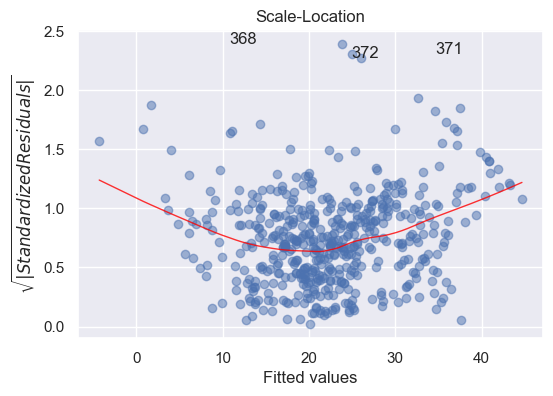

In [21]:
plot_lm_3 = plt.figure(figsize=(6,4))

plt.scatter(model_fitted, model_norm_residuals_abs_sqrt, alpha=0.5);

sns.regplot(x=model_fitted, y=model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted[i],
                             model_norm_residuals_abs_sqrt[i]));


#### The Scale-Location Plot is used to assess the homoscedasticity assumption, which implies that the spread of residuals remains constant across all levels of the independent variable(s).
#### The more horizontal the red line is, the more likely the data is homoscedastic. 
#### While a typical heteroscedastic plot has a sideways “V” shape, our graph has higher values on the left and on the right versus in the middle. This might be caused by not capturing the non-linearities in the model (see Residuals vs Fitted plot). 
#### The two most common methods of “fixing” heteroscedasticity is using a weighted least squares approach, or using a heteroscedastic-corrected covariance matrix (hccm).


#### Consistent Spread: A consistent spread of points suggests homoscedasticity, indicating that the variability of the residuals is constant.
#### Increasing/Decreasing Spread: An increasing or decreasing spread may indicate heteroscedasticity, where the variability of residuals changes with the level of the predictor variable.

### Residuals vs Leverage Plot

#### The Residuals vs Leverage plot helps identify influential observations or outliers that may disproportionately impact the model.



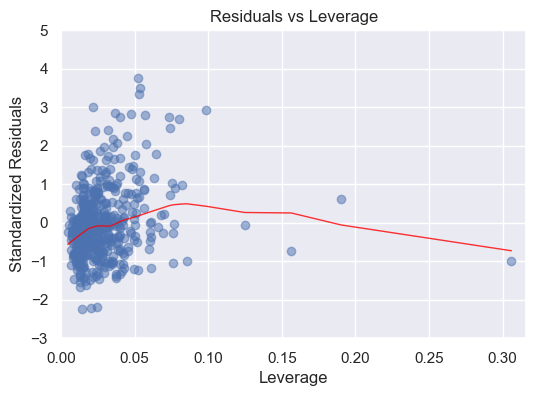

In [22]:
plot_lm_4 = plt.figure(figsize=(6,4));

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);

sns.regplot(x=model_leverage, y=model_norm_residuals,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
  plot_lm_4.axes[0].annotate(i,
                             xy=(model_leverage[i],
                             model_norm_residuals[i]));

#### This plot is used to check for influential outliers using the cook’s distance. An influential outlier is a point that greatly affects the slope of the regression line.

#### We only need to find leverage points that have a distance greater than 0.5. In this plot, we do not have any leverage points that meet this criteria and remove points with a Cook’s distance of less than 0.5, especially if there are only a few observations compared to the rest of the data.

#### Points within Bounds: Most points should fall within the Cook’s distance bounds, indicating that they have a low impact on the model.

#### Points outside Bounds: Points outside the bounds are potentially influential. These observations can significantly affect the model fit and merit closer examination.